In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Training.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Tidak ada missing value pada dataset ini

In [7]:
df.duplicated().sum()

2000

Memiliki 2000 nilai duplikat

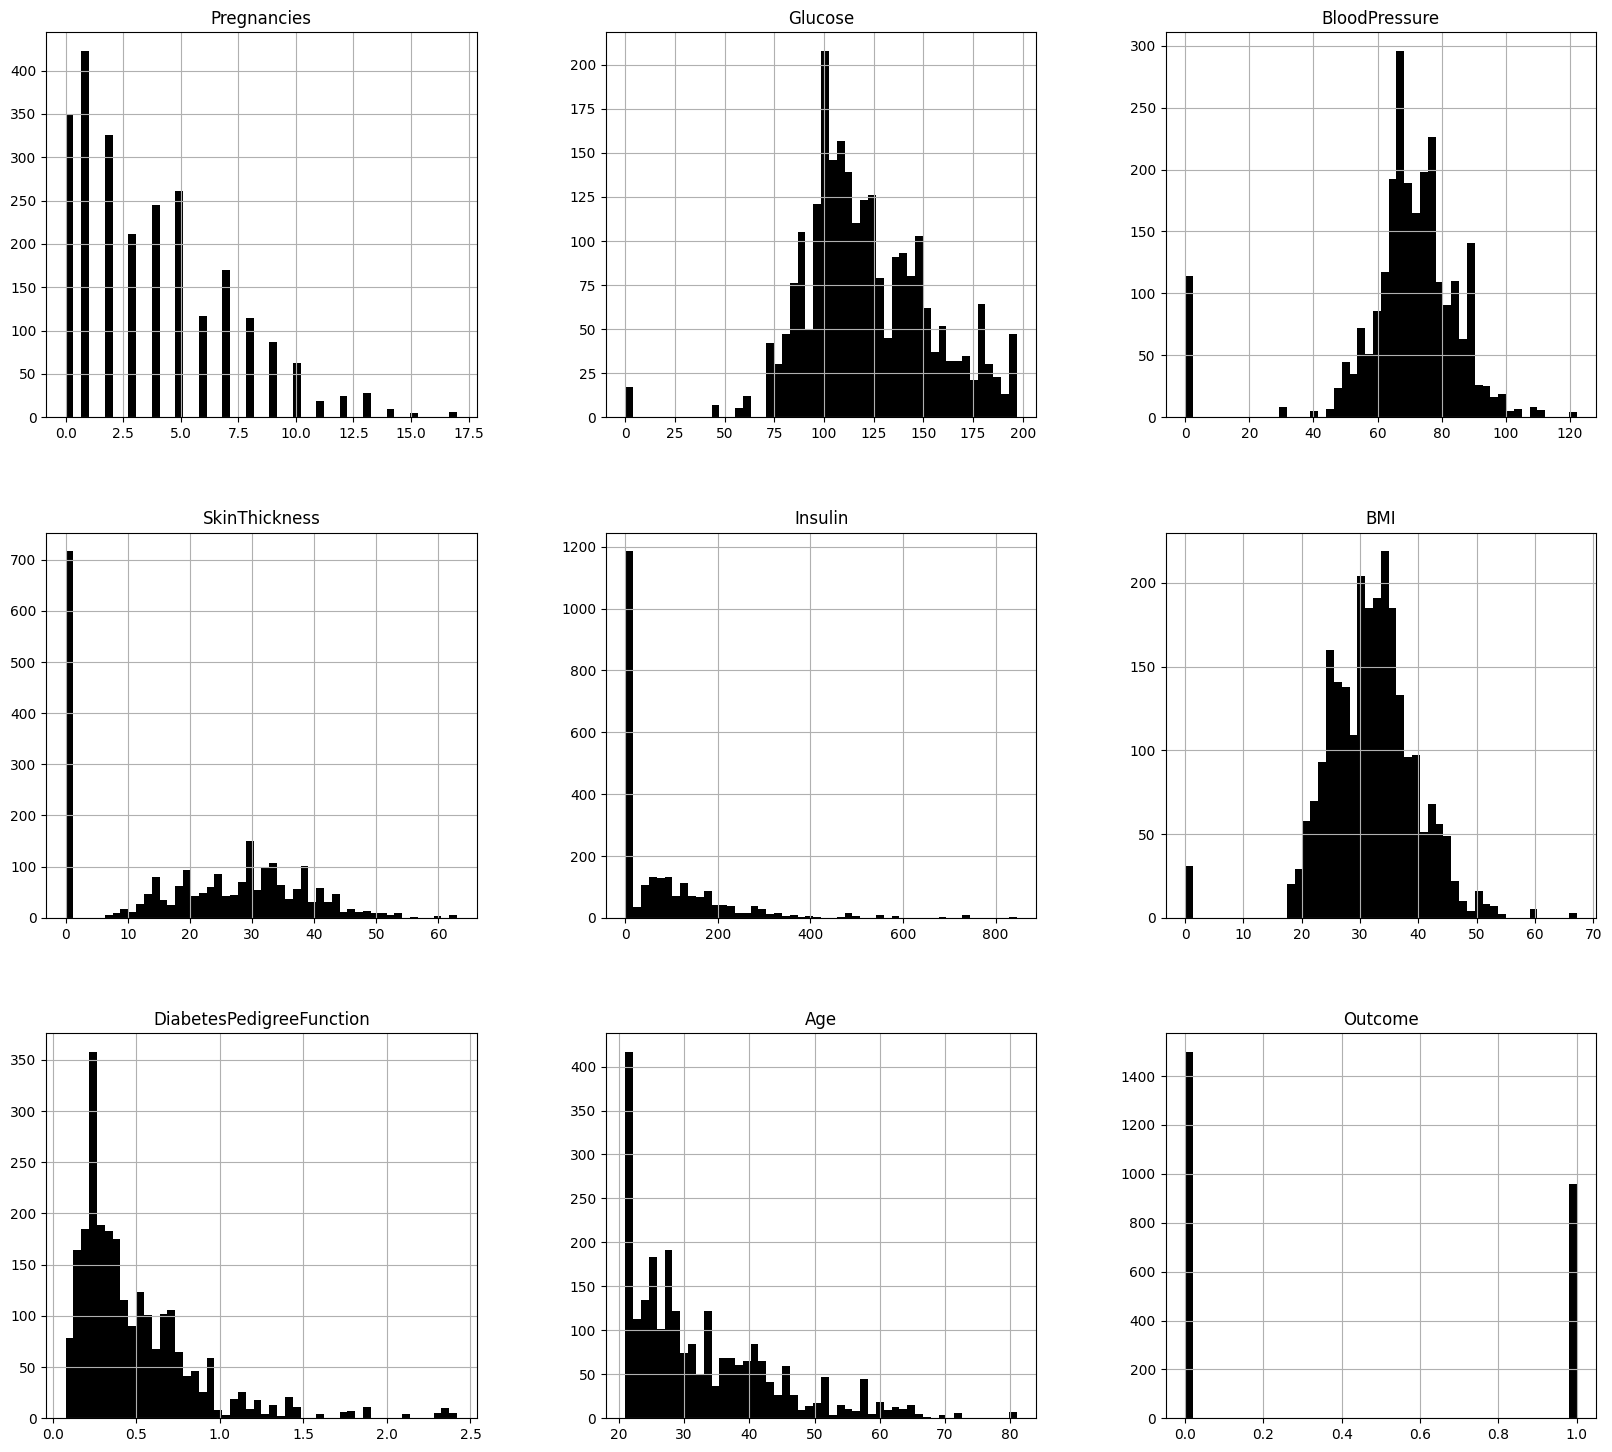

In [8]:
df.hist(bins=50, figsize=(20,18), color='black');

Data tidak berdistribusi normal banyak variabel yang condong ke kanan (skewed ke kanan), yang menunjukkan distribusi nilai rendah pada beberapa fitur. Maka diperlukan pengecekan outliers

In [9]:
# def_baru = []
def outlier (df):
  columns = df.select_dtypes(include=['int', 'float']).columns
  outlier_counts = {}
  for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[x] < lower_bound) | (df[x] > upper_bound)]
    outlier_counts[x] = len(outliers)

  return outlier_counts

outlier_counts = outlier(df)
print(f'jumlah data outlier: {outlier_counts}')

jumlah data outlier: {'Pregnancies': 21, 'Glucose': 17, 'BloodPressure': 140, 'SkinThickness': 0, 'Insulin': 97, 'BMI': 56, 'DiabetesPedigreeFunction': 103, 'Age': 63, 'Outcome': 0}


Jumlah outlier dari masing masing variabel

In [10]:
def remove_outlier(df):
  columns = df.select_dtypes(include=['int', 'float']).columns
  cleaned_data = df.copy() # membuat salinan dataframe untuk menghindari perubahan pada data asli
  for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
  return cleaned_data

df_cleaned = remove_outlier(df)

Proses penghapusan outlier sebagai tahap normalisasi

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2027 non-null   int64  
 1   Glucose                   2027 non-null   int64  
 2   BloodPressure             2027 non-null   int64  
 3   SkinThickness             2027 non-null   int64  
 4   Insulin                   2027 non-null   int64  
 5   BMI                       2027 non-null   float64
 6   DiabetesPedigreeFunction  2027 non-null   float64
 7   Age                       2027 non-null   int64  
 8   Outcome                   2027 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 158.4 KB


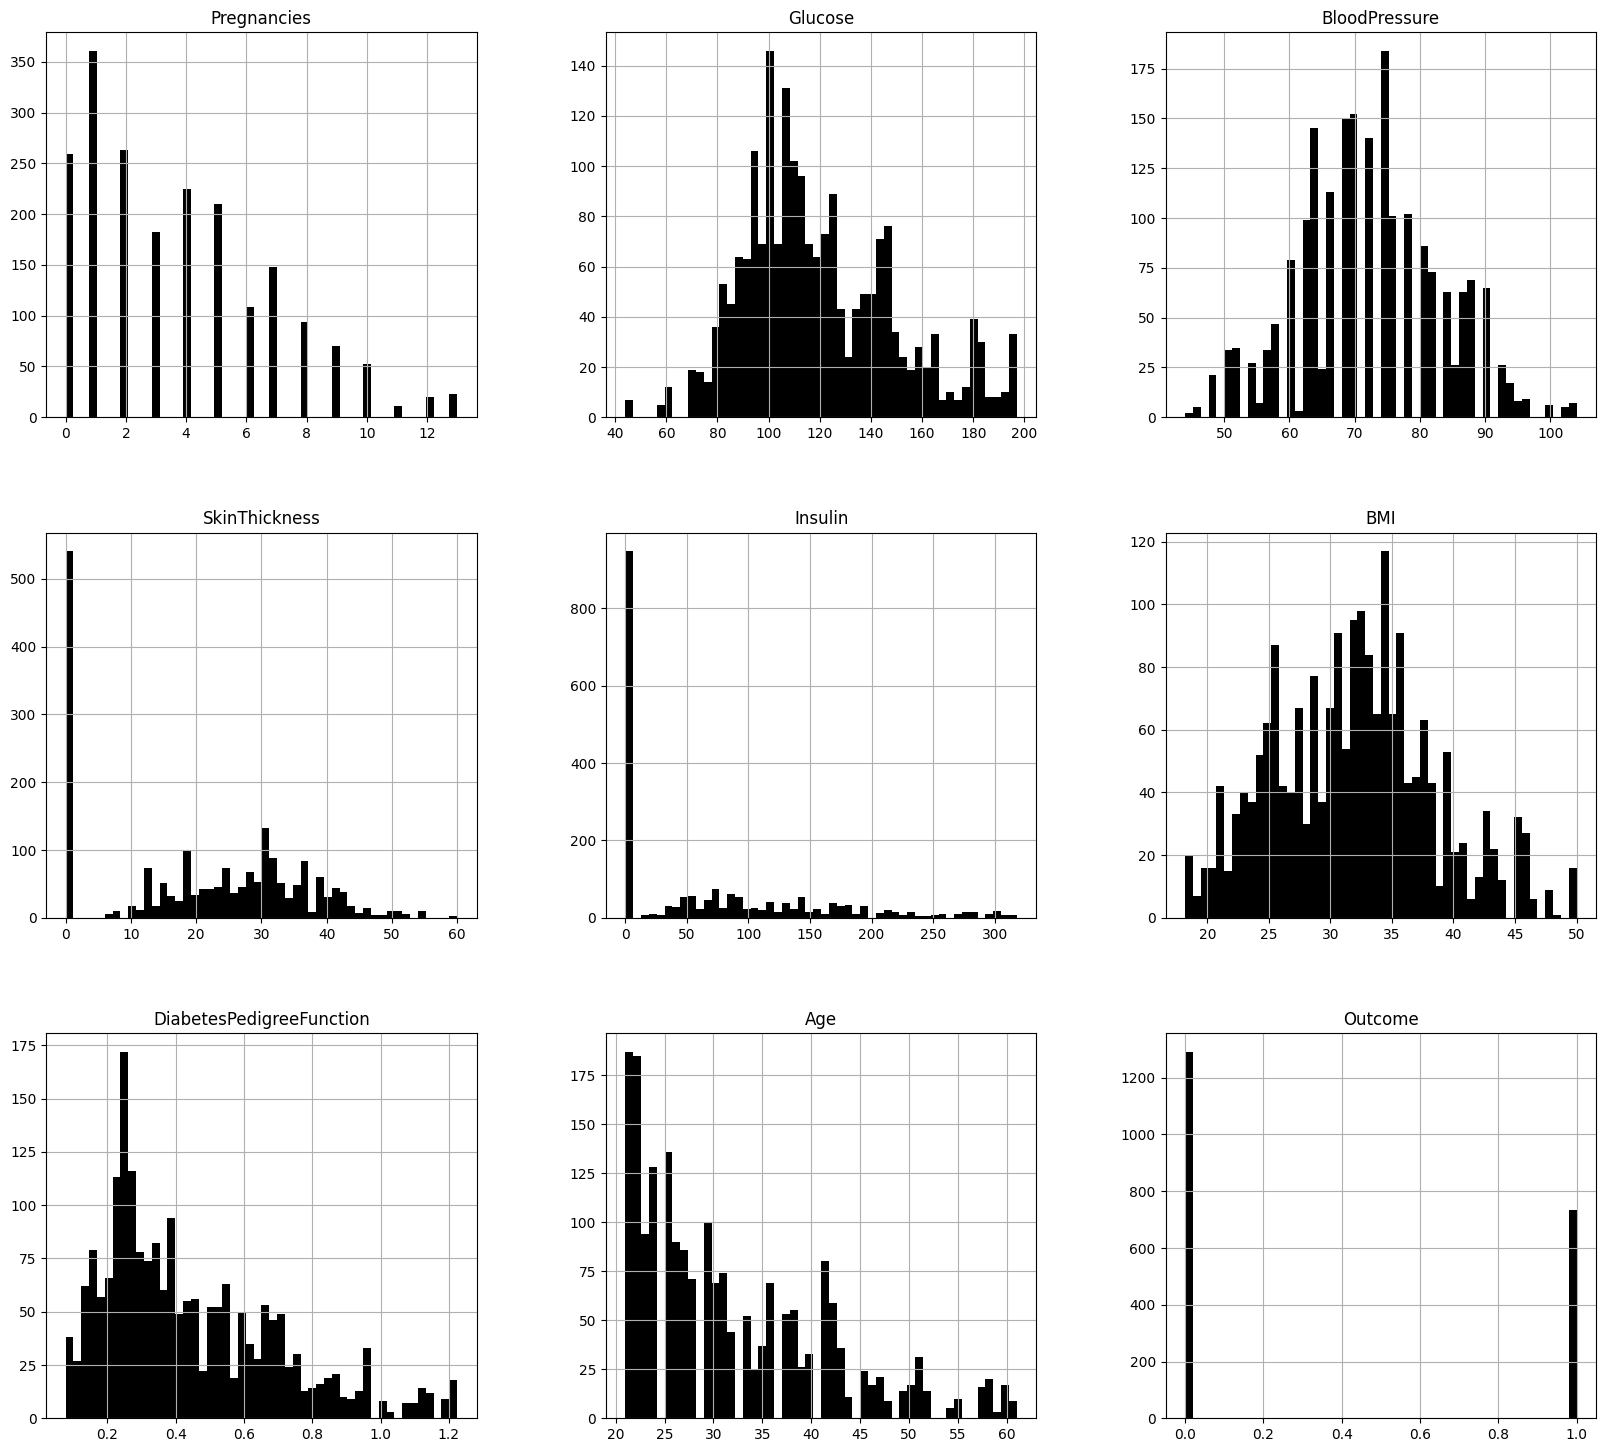

In [12]:
df_cleaned.hist(bins=50, figsize=(20,18), color='black');

Setelah dilakukan normalisasi, data terlihat lebih normal

<Axes: title={'center': 'Correlation Between Variables'}>

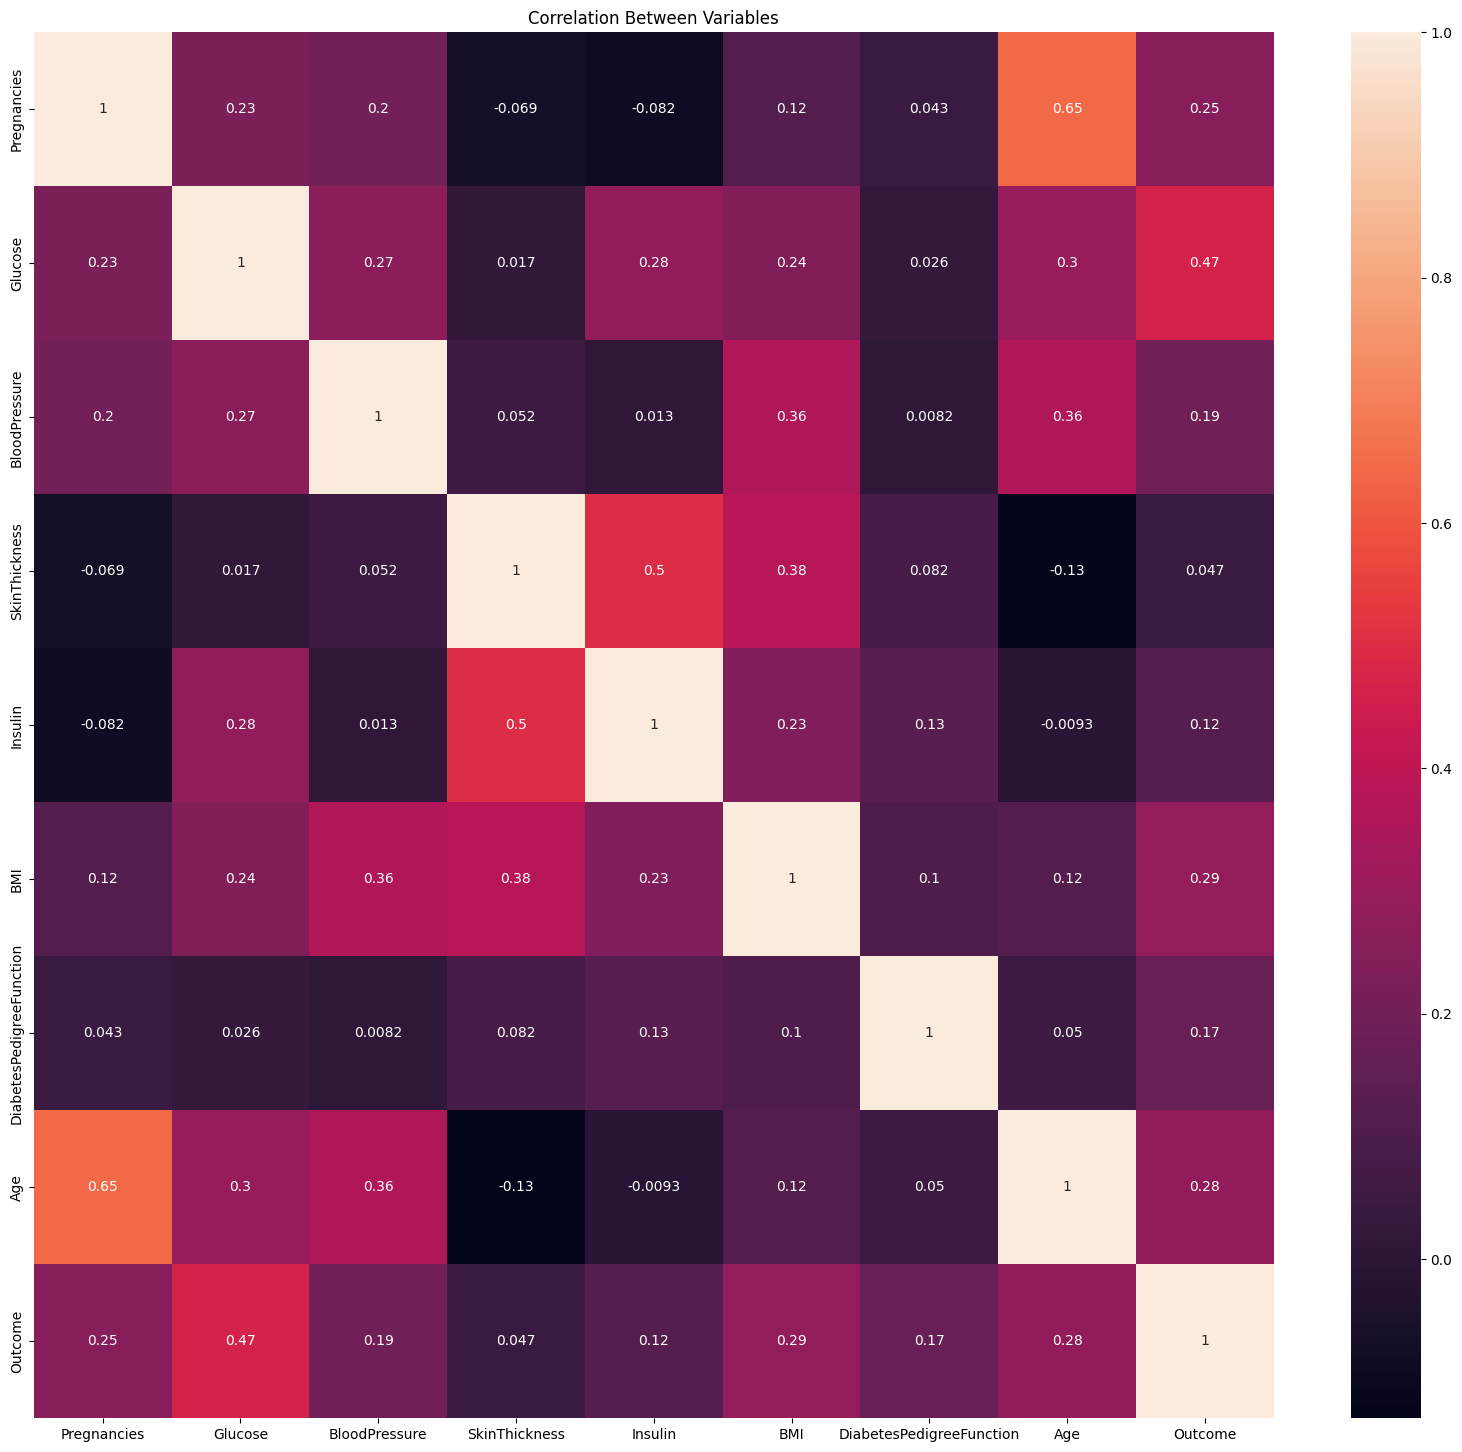

In [13]:
df_numerics = df_cleaned.select_dtypes(include=[np.number])

plt.figure(figsize=(20,18))
plt.title('Correlation Between Variables')
sns.heatmap(data = df_numerics.corr(), annot=True)

Melihat korelasi antar variabel

# Lakukan pemodelan menggunakan algoritma klasifikasi KNN, Decision Tree dan Naive Bayes

In [15]:
x = df_cleaned.drop(columns='Outcome')
y = df_cleaned['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

1. KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn)) # lebih fokus ke recall 0.8
print(precision_score(y_test, y_pred_knn))

[[259   3]
 [  3 141]]
0.9852216748768473
0.9791666666666666
0.9791666666666666


Confusion matrix KNN, yang diperoleh True Negative (TN) nya yaitu 259, False Postive (FP) dan False Negative (FN) yaitu 3, kemudian True Positive (TP) yaitu 141. Dan juga untuk nilai akurasi nya yaitu 0.985, nilai recall  dan nilai precision nya yaitu 0.979.

<Axes: >

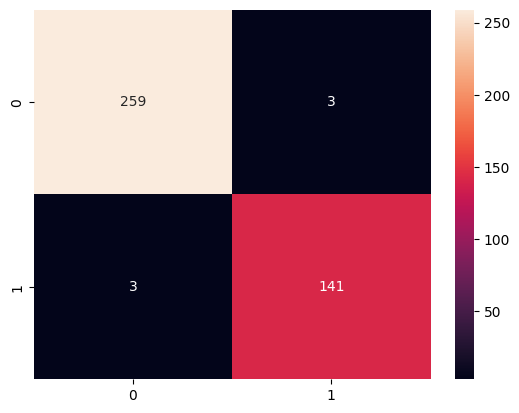

In [20]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')

2. Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [22]:
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

[[262   0]
 [  1 143]]
0.9975369458128078
0.9930555555555556
1.0


Confusion matrix Decision Tree, yang diperoleh True Negative (TN) nya yaitu 262, False Postive (FP) nya yaitu 0 dan False Negative (FN) yaitu 1, kemudian True Positive (TP) yaitu 143. Dan juga untuk nilai akurasi nya yaitu 0.997, nilai recall nya yaitu 0.993  dan nilai precision nya yaitu 1.0.

<Axes: >

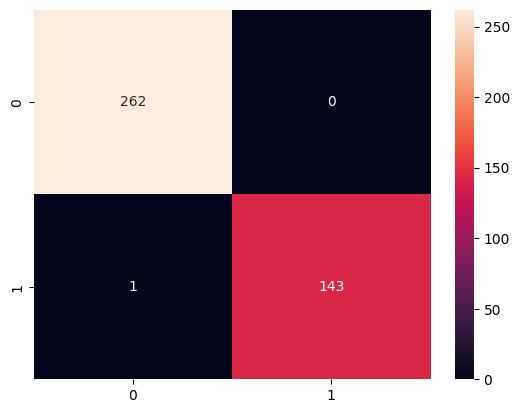

In [23]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')

3. Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

In [25]:
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(recall_score(y_test, y_pred_nb))
print(precision_score(y_test, y_pred_nb))

[[201  61]
 [ 61  83]]
0.6995073891625616
0.5763888888888888
0.5763888888888888


Confusion matrix KNN, yang diperoleh True Negative (TN) nya yaitu 201, False Postive (FP) dan False Negative (FN) yaitu 61, kemudian True Positive (TP) yaitu 83. Dan juga untuk nilai akurasi nya yaitu 0.69, nilai recall  dan nilai precision nya yaitu 0.57.



<Axes: >

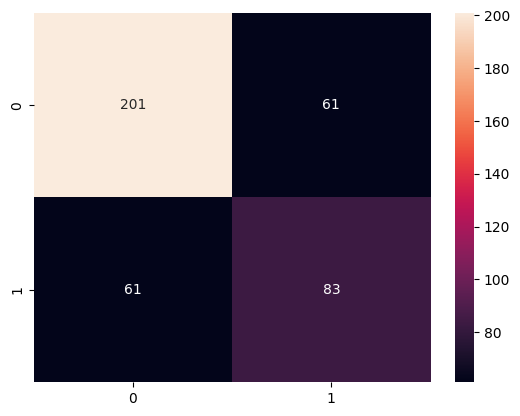

In [26]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d')

Gunakan matriks evaluasi accuracy score, recall dan precision. buatlah kesimpulan algoritma mana yang paling baik.

Kesimpulan: Decision Tree adalah model terbaik karena memiliki accuracy tertinggi (99.7%), nilai precisionnya 100% yang mana tidak ada false positive, nilai recall sangat tinggi (99.3%) dan hanya melakukan 1 kesalahan prediksi dari seluruh dataset